<a href="https://colab.research.google.com/github/aks2093/Intent-Mapping-with-zero-shot-learning-and-BERT-/blob/main/intent_mapping_with_zero_shot_and_bert_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Data**

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/My Drive/yellow_messenger/bmw_training_set.csv")

In [ ]:
print("Dataset length: {}".format(data.__len__()))
print("Dataset columns: {}".format(data.columns))

Dataset length: 1451
Dataset columns: Index(['Intent', 'Utterance'], dtype='object')


In [ ]:
data["Intent"].unique()
data["Intent"].unique().__len__()

144

**Checking number of Intances in each Intent**

In [ ]:
intent_groupby_res = data.groupby("Intent")["Intent"].count().to_dict()
intent_groupby_res

{'about': 22,
 'about_bmwcc': 7,
 'access_to_openfiles': 19,
 'angry': 5,
 'anyone-there': 5,
 'apple-carplay': 9,
 'applydealership': 12,
 'appreciation': 13,
 'are-there-any-issues-in-the-bmw': 6,
 'are-you-human': 2,
 'are-you-hungry': 6,
 'are-you-smart': 5,
 'ask-me-anything': 2,
 'assured-buyback': 6,
 'automatic-variant-of-bmw': 15,
 'battery-life': 21,
 'battery-replace-cost': 18,
 'bmw-service-details': 13,
 'bmw_book': 60,
 'bmw_buy': 21,
 'bmw_chinese_brand': 12,
 'bmw_city': 26,
 'bmw_fuel': 18,
 'bmw_india': 4,
 'bmw_launch': 18,
 'bmw_price': 28,
 'bmw_reopenings': 4,
 'bmw_specification': 50,
 'bmwfeature': 43,
 'bmwinternet': 7,
 'bmwmanufacturing': 8,
 'bmwwhat': 19,
 'bookings-received': 15,
 'boring_tired': 6,
 'brand_ambd_common': 6,
 'brand_ambd_to_india': 4,
 'british-chinese': 6,
 'bs_vi-version': 20,
 'can-you-hear-me': 3,
 'car-service': 5,
 'careers': 25,
 'changemaker': 4,
 'chinese-parts': 7,
 'chinesebrand': 9,
 'comliment': 6,
 'comments-about-recent-slowd

We can clearly see that there are few Intents where the number of instances are very less like:

if-i-change-my-preferred-booked-variant-or-color-choice: 2

lol: 3

i-am-bored: 2

and many more.

Since we can see from above that number of data points are really less so we will have to use a pretrained model to map **Utterances** with their respective **Intent** Using Transfer Learning

We can try with 2 approaches.
1. With Zero shot learning
2. By fine tuning the BERT

# **With zero shot learning**

In [ ]:
!pip install transformers==3.1.0
!pip install langdetect

     |████████████████████████████████| 890kB 7.0MB/s 
     |████████████████████████████████| 3.0MB 42.4MB/s 
     |████████████████████████████████| 1.1MB 41.5MB/s 
     |████████████████████████████████| 890kB 39.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=71ef9bef916fc3ec9ecc4a15c688de03c4613b74d8a54081294c13ed2387979a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 983kB 6.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=4f85f60afd2a2e4a92a8116793b7e07ab094bf3a4b6528fd7e2b053c84f93d8e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
import csv
import re
import time
import traceback
from urllib.parse import urlparse
import requests
from langdetect import detect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import argmax

from transformers import pipeline

Defining Classifier for "zero-shot-classification"

In [ ]:
classifier = pipeline("zero-shot-classification", device=0)
candidate_labels = data["Intent"].unique().tolist()

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
candidate_results = {}
label_mapping = {}
count = 0
actual_intent = []
pred_intent = []

for label in candidate_labels:
    candidate_results[label] = 0
    label_mapping[label] = count
    count += 1

for intent in data["Intent"].values:
    actual_intent.append(label_mapping[intent])

for text in data["Utterance"].values:
    print("text: ", text)
    res = classifier(text.lower(), candidate_labels, multi_class=True)

    SCORES = res["scores"]
    CLASSES = res["labels"]
    BEST_INDEX = argmax(SCORES)
    predicted_class = CLASSES[BEST_INDEX]
    predicted_score = SCORES[BEST_INDEX]
    pred_intent.append(label_mapping[predicted_class])

    for label in candidate_labels:
        if predicted_class == label and predicted_score > 0.5:
            candidate_results[label] += 1


text:  who is brandambd
text:  future cars
text:  smart cars
text:  tell me about fuel type
text:  who is your brand ambassador
text:  how much is it for bmw car
text:  is bmw available in delhi
text:  why not an indian actor as brandambd
text:  when is brandambd  coming to India
text:  Can I book bmw in advance?
text:  brand ambassador
text:  apply for dealership
text:  who represents your brand
text:  will it run on petrol or diesel
text:  Is bmw powered by Internet
text:  why british actor
text:  Is bmw available in surat
text:  brandambd visit india
text:  bmw garages car club
text:  are there any prebooking available for bmw
text:  Is bmw available in my city?
text:  bmw garages history
text:  Is bmw available in bangalore
text:  what's about prebooking bmw
text:  what is bmw garages bmw
text:  why not indian
text:  where is bmw garages dealership in bangalore
text:  bmw launch in India
text:  can you tell me about car club india
text:  What is the price for this car?
text:  what 

In [ ]:
print("pred_intent length: ", len(pred_intent))
print("actual_intent length: ", len(actual_intent))

pred_intent length:  1451
actual_intent length:  1451


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
print(accuracy_score(actual_intent,pred_intent))
print(confusion_matrix(actual_intent,pred_intent))

0.3349414197105445
[[3 0 0 ... 0 0 1]
 [0 3 0 ... 0 0 1]
 [0 0 4 ... 0 0 2]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# confusion_matrix_df = pd.DataFrame(confusion_matrix(actual_intent,pred_intent))
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize = (20, 20))
# sns.heatmap(confusion_matrix_df, annot=True)

In [ ]:
match = 0
for p,a in zip(pred_intent, actual_intent):
    if p==a:
        match += 1
print(match)

486


**Conclusion on zero-shot-classification**

From the zero shot classification results we can clearly see that we can only classify only 486 instances out of 1451.

There we need a strong predictive model to handle this task

# **Lets Try with fine tuning the BERT model**

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/My Drive/yellow_messenger/bmw_training_set.csv")

In [ ]:
data.head()

,Intent,Utterance
0,who_brand_ambd,who is brandambd
1,future_cars,future cars
2,ismart,smart cars
3,bmw_fuel,tell me about fuel type
4,who_brand_ambd,who is your brand ambassador


In [ ]:
unique_intents = data["Intent"].unique().tolist()
print("Total Unique Intent: ", len(unique_intents))
intent_mapping  = {}
count = 0
for intent in unique_intents:
    intent_mapping[intent] = count
    count += 1

Total Unique Intent:  144


**Convert all intents to their respective number(index)**

In [ ]:
data["Intent"] = data["Intent"].apply(lambda x:intent_mapping[x])
data["Intent"]

0         0
1         1
2         2
3         3
4         0
       ... 
1446    126
1447    127
1448    127
1449    127
1450    127
Name: Intent, Length: 1451, dtype: int64

**GPU setup**

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


**Installing transformers**

In [ ]:
!pip install transformers

**get BERT tokenizer**

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
data.loc[data["Intent"] == 0].sample(5)[['Utterance', 'Intent']]

,Utterance,Intent
0,who is brandambd,0
4,who is your brand ambassador,0
629,can you tell me the brand ambassador name,0
10,brand ambassador,0
55,who is your brand ambassador,0


**fetch the required the data**

In [ ]:
sentences = data["Utterance"].values
labels = data["Intent"].values

**Visualizing the token_ids and tokens**

In [ ]:
print(' Original Text: ', sentences[0])
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  who is brandambd
Tokenized:  ['who', 'is', 'brand', '##am', '##b', '##d']
Token IDs:  [2040, 2003, 4435, 3286, 2497, 2094]


In [ ]:
max_len = 0

for sent in sentences:
    input_ids = tokenizer.encode(sent, add_special_tokens=True )
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  35


**Visualize the length of various text sentences(Utterances)**

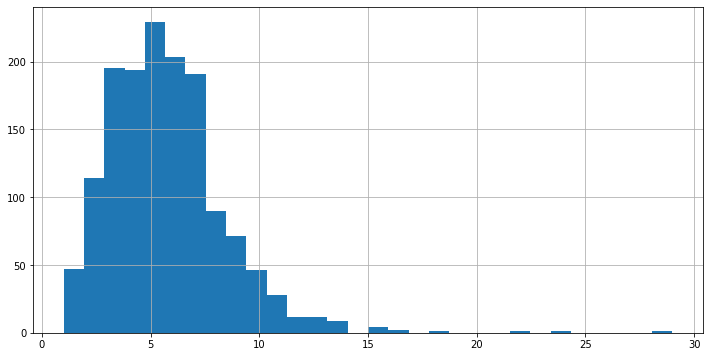

In [ ]:
seq_len = [len(i.split()) for i in sentences]
pd.Series(seq_len).hist(bins = 30)

**from the above graph it is clear that there are very les number of Utterances whose length is greater than 10**

So lets choose max_length as 10 for encoding

**Tokenize the Utterances (get encodings, ids, and attention masks)**

In [ ]:
input_ids = []
attention_masks = []
import logging

# logging.getLogger("pytorch_pretrained_bert.tokenization").setLevel(logging.ERROR)

# For every sentence...
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                     
                        add_special_tokens = True, 
                        max_length = 10, #32           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',    
                        truncation=True
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    

    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  who is brandambd
Token IDs: tensor([ 101, 2040, 2003, 4435, 3286, 2497, 2094,  102,    0,    0])


**Do train and validation Split**

In [ ]:
from torch.utils.data import TensorDataset, random_split


dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

1,305 training samples
  146 validation samples


**Create train_dataloader and validation_dataloader for model training and evaluation**

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16


train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )


**get classification model, we gonna use BertForSequenceClassification class of BERT**

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 144,
                       
    output_attentions = False, 
    output_hidden_states = False 
)

# run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

**Optimizer**

In [ ]:
optimizer = AdamW(model.parameters(),lr = 2e-5, eps = 1e-8 )

**epochs and learning rate scheduler**

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 20
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

**Define function for accuracy**

In [ ]:
import numpy as np

def accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

**Define a function to format the time taken in training**

In [ ]:
import time
import datetime

def format_time(elapsed):
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

**Fine tune the BertForSequenceClassification model**

In [ ]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0
    total_train_accuracy = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_train_accuracy += accuracy(logits, label_ids)
        total_train_loss += loss.item()
    

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)  
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)          
    
    training_time = format_time(time.time() - t0)

    print("")
    print("  Training Accuracy: {0:.2f}".format(avg_train_accuracy))
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += accuracy(logits, label_ids)
        
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Validation Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    

    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Accuracy': avg_train_accuracy,
            'Validation Loss': avg_val_loss,
            'Validation Accuracy': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 20 ========
Training...
  Batch    40  of     82.    Elapsed: 0:00:06.
  Batch    80  of     82.    Elapsed: 0:00:13.

  Training Accuracy: 0.05
  Average training loss: 4.81
  Training epcoh took: 0:00:13

Running Validation...
  Validation Accuracy: 0.20
  Validation Loss: 4.34
  Validation took: 0:00:00

======== Epoch 2 / 20 ========
Training...
  Batch    40  of     82.    Elapsed: 0:00:06.
  Batch    80  of     82.    Elapsed: 0:00:13.

  Training Accuracy: 0.13
  Average training loss: 4.33
  Training epcoh took: 0:00:13

Running Validation...
  Validation Accuracy: 0.26
  Validation Loss: 3.95
  Validation took: 0:00:00

======== Epoch 3 / 20 ========
Training...
  Batch    40  of     82.    Elapsed: 0:00:06.
  Batch    80  of     82.    Elapsed: 0:00:13.

  Training Accuracy: 0.21
  Average training loss: 3.96
  Training epcoh took: 0:00:13

Running Validation...
  Validation Accuracy: 0.39
  Validation Loss: 3.52
  Validation took: 0:00:00

======== Epoch 

**Visualizing the model training statistics**

In [ ]:
import pandas as pd

pd.set_option('precision', 2)

df_stats = pd.DataFrame(data=training_stats)

df_stats = df_stats.set_index('epoch')

df_stats

,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy,Training Time,Validation Time
epoch,,,,,,
1,4.81,0.05,4.34,0.20,0:00:13,0:00:00
2,4.33,0.13,3.95,0.26,0:00:13,0:00:00
3,3.96,0.21,3.52,0.39,0:00:13,0:00:00
4,3.58,0.31,3.18,0.46,0:00:13,0:00:00
5,3.24,0.43,2.89,0.50,0:00:13,0:00:00
6,2.93,0.54,2.66,0.57,0:00:13,0:00:00
7,2.65,0.62,2.46,0.60,0:00:13,0:00:00
8,2.40,0.71,2.29,0.65,0:00:13,0:00:00
9,2.19,0.76,2.14,0.69,0:00:13,0:00:00


**Visualizing the Training and Validation loss**

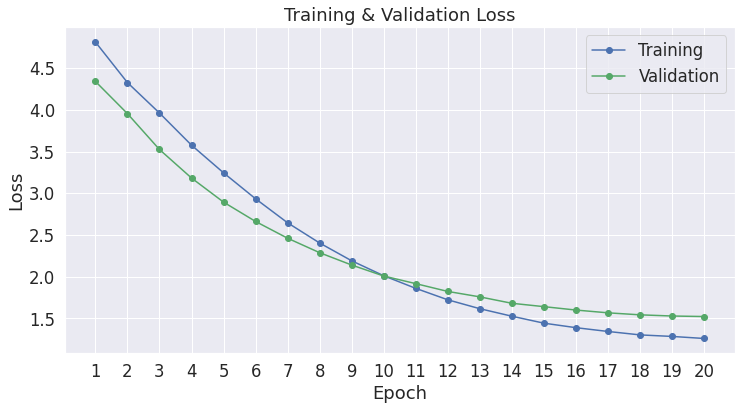

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Validation Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

plt.show()

**Visualizing the Training and Validation Accuracy**

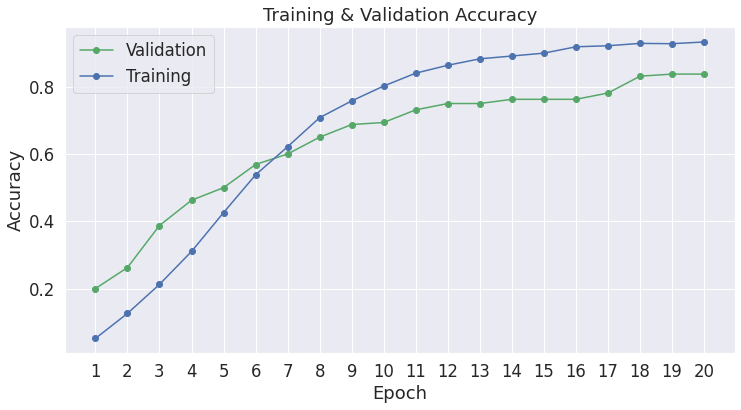

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)

# plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Validation Accuracy'], 'g-o', label="Validation")
plt.plot(df_stats['Training Accuracy'], 'b-o', label="Training")

plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

plt.show()

**Conclusion on fine-tuned BertForSequenceClassification classifier**

It can be clearly seen that fine-tuned BertForSequenceClassification performing way better than the zero-shot-classification. 
And we are able to achieve train_acc=93% and val_acc=84%

**Save the Fine Tuned model**

In [ ]:
import os
import json

output_dir = '/content/drive/My Drive/yellow_messenger/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)
with open("/content/drive/My Drive/yellow_messenger/intent_mapping.json", "w") as fd:
    json.dump(intent_mapping,fd)

model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to /content/drive/My Drive/yellow_messenger/


('/content/drive/My Drive/yellow_messenger/vocab.txt',
 '/content/drive/My Drive/yellow_messenger/special_tokens_map.json',
 '/content/drive/My Drive/yellow_messenger/added_tokens.json')

**Function to make inference from Fine-Tuned Model**

**Note:** Below steps are required before calling the get_predictions() function on text sentences.

In [ ]:
!pip install transformers
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer
import json
import torch
import pandas as pd
import numpy as np

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [ ]:
output_dir = '/content/drive/My Drive/yellow_messenger/'

with open("/content/drive/My Drive/yellow_messenger/intent_mapping.json", "r") as fd:
    intent_mapping = json.load(fd)

intent_mapping_keys = list(intent_mapping.keys())
intent_mapping_values = list(intent_mapping.values())


config = BertConfig.from_pretrained(output_dir)
model = BertForSequenceClassification.from_pretrained(output_dir,
                                                      output_attentions = False, 
                                                      output_hidden_states = False) #load the model
model.to(device)

tokenizer = BertTokenizer.from_pretrained(output_dir) #load the tonkenizer


In [ ]:
def get_tokens_and_mask(text):
    input_ids = []
    attention_masks = []
    
    encoded_dict = tokenizer.encode_plus(
                        text,                     
                        add_special_tokens = True, 
                        max_length = 10, 
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',    
                        truncation=True
                )
    return encoded_dict

**Defining the get_predictions function which takes one text senetence as an argument and return its respective intent**

and for the demo purpose , 20 datapoints got sampled out from the dataset and made Intent Prediction on them

In [ ]:
def get_predictions(text):
    model.eval()
    with torch.no_grad():
        inputs = get_tokens_and_mask(text)
        
        with torch.no_grad(): 
            preds = model(**inputs)
            pred_idx = np.argmax(preds[0].numpy().ravel())
    
    predicted_intent=intent_mapping_keys[pred_idx]
    return predicted_intent

#demo get prediction
data = pd.read_csv("/content/drive/My Drive/yellow_messenger/bmw_training_set.csv")

sample_data = data.sample(20)
texts = sample_data["Utterance"].values
labels = sample_data["Intent"].values
pred_data_frame = pd.DataFrame(columns=["text", "actual Intent", "predicted Intent"])

for text, label in zip(texts, labels):
    predicted_intent = get_predictions(text)
    d = {"text": text, "actual Intent": label, "predicted Intent":predicted_intent}
    pred_data_frame = pred_data_frame.append(d, ignore_index=True)
    print("\033[95m text: {}".format(text))
    print("\033[92m Actual intent:: ", label) 
    print("\033[94m Predicted Intent:: ", predicted_intent)
    print("")




/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


 text: is bmw worth the wait
 Actual intent::  waitcompetitor
 Predicted Intent::  waitcompetitor

 text: when will bookings reopen
 Actual intent::  bmw_book
 Predicted Intent::  bmw_book

 text: whether its worth to wait for bmw garages cars
 Actual intent::  waitcompetitor
 Predicted Intent::  waitcompetitor

 text: how safe is bmw bmw
 Actual intent::  bmwfeature
 Predicted Intent::  bmwfeature

 text: is bmw connected to internet
 Actual intent::  bmwinternet
 Predicted Intent::  bmwinternet

 text: i would like to buy bmw
 Actual intent::  bmw_buy
 Predicted Intent::  bmw_buy

 text: How can I keep a track of the points earned?
 Actual intent::  points
 Predicted Intent::  points

 text: My car bumped with another car while in the traffic
 Actual intent::  inconvenience
 Predicted Intent::  inconvenience

 text: My car battery exploded.
 Actual intent::  inconvenience
 Predicted Intent::  inconvenience

 text: when is brand ambassador visiting india
 Actual intent::  brand_ambd_t

**Let's look at pred_dataframe**

In [ ]:
pred_data_frame

,text,actual Intent,predicted Intent
0,is bmw worth the wait,waitcompetitor,waitcompetitor
1,when will bookings reopen,bmw_book,bmw_book
2,whether its worth to wait for bmw garages cars,waitcompetitor,waitcompetitor
3,how safe is bmw bmw,bmwfeature,bmwfeature
4,is bmw connected to internet,bmwinternet,bmwinternet
5,i would like to buy bmw,bmw_buy,bmw_buy
6,How can I keep a track of the points earned?,points,points
7,My car bumped with another car while in the tr...,inconvenience,inconvenience
8,My car battery exploded.,inconvenience,inconvenience
9,when is brand ambassador visiting india,brand_ambd_to_india,brand_ambd_to_india


We can see from the above results , that model is performing good.

You can try out get_prediction() function on your own test data set.